In [1]:
cd C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/csv/5000hz/3000rpm

C:\Users\7-2009-1186-16\Desktop\-sampling-frequency-hz-\csv\5000hz\3000rpm


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 파일 로드
normal_data = pd.read_csv("3000rpm normal data/stream2024_4_23_0_2.csv")
carriage_data = pd.read_csv("3000rpm carriage damage/stream2024_4_23_3_30.csv")
highspeed_data = pd.read_csv("3000rpm high-speed damage/stream2024_4_23_0_57.csv")
lack_data = pd.read_csv("3000rpm lack of lubrication/stream2024_4_23_2_40.csv")
corrosin = pd.read_csv("3000rpm oxidation and corrosion/stream2024_4_23_1_50.csv")

# 정상 데이터에 레이블 0(정상) 할당, 비정상 데이터에 레이블 1(비정상) 할당
normal_data['label'] = 0
carriage_data['label'] = 1
#highspeed_data['label'] = 1
#lack_data['label'] = 1
#corrosin['label'] = 1

# 데이터 결합
combined_data = pd.concat([normal_data, carriage_data], ignore_index=True)
#combined_data = pd.concat([normal_data, carriage_data, highspeed_data, lack_data, corrosin], ignore_index=True)

print(combined_data)

In [ ]:
# 데이터 시각화
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 데이터 파일을 읽어옵니다.
#normal_data = pd.read_csv("3000rpm normal data/stream2024_4_23_0_2.csv")
#carriage_data = pd.read_csv("3000rpm carriage damage/stream2024_4_23_3_30.csv")
#highspeed_data = pd.read_csv("3000rpm high-speed damage/stream2024_4_23_0_57.csv")
#lack_data = pd.read_csv("3000rpm lack of lubrication/stream2024_4_23_2_40.csv")
#corrosin = pd.read_csv("3000rpm oxidation and corrosion/stream2024_4_23_1_50.csv")



plt.figure(figsize=(15, 5))
plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(normal_data['motor1_y'], label='Y Axis')
#plt.plot(normal_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
plt.plot(combined_data['motor1_y'], label='Y Axis')
#plt.plot(combined_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(combined_data['motor1_y'], label='Y Axis')
plt.plot(combined_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(combined_data['motor1_y'], label='Y Axis')
plt.plot(combined_data['sound'], label='sound')
plt.title('Sound Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# FFT 변환
fft_x = np.fft.fft(normal_data['motor1_x'])
fft_y = np.fft.fft(normal_data['motor1_y'])
fft_z = np.fft.fft(normal_data['motor1_z'])
fft_sound = np.fft.fft(normal_data['sound'])

fft_x_f = np.fft.fft(carriage_data['motor1_x'])
fft_y_f = np.fft.fft(carriage_data['motor1_y'])
fft_z_f = np.fft.fft(carriage_data['motor1_z'])
fft_sound_f = np.fft.fft(carriage_data['sound'])

# 주파수 축 생성
freq = np.fft.fftfreq(len(fft_x), d=1/5000)  # '5000hz'는 데이터의 샘플링 레이트

plt.figure(figsize=(15, 5))

# FFT 결과의 크기 (magnitude) 시각화
plt.plot(freq, np.abs(fft_x), label='normal X Axis')
plt.plot(freq, np.abs(fft_x_f), label='fault X Axis')
#plt.plot(freq, np.abs(fft_y), label='Y Axis')
#plt.plot(freq, np.abs(fft_z), label='Z Axis')

# 그래프 타이틀 및 레이블 설정
plt.title('FFT of Vibration Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))

# FFT 결과의 크기 (magnitude) 시각화
#plt.plot(freq, np.abs(fft_x), label='X Axis')
plt.plot(freq, np.abs(fft_y), label='normal Y Axis')
plt.plot(freq, np.abs(fft_y_f), label='fault Y Axis')
#plt.plot(freq, np.abs(fft_z), label='Z Axis')

# 그래프 타이틀 및 레이블 설정
plt.title('FFT of Vibration Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))

# FFT 결과의 크기 (magnitude) 시각화
#plt.plot(freq, np.abs(fft_x), label='X Axis')
#plt.plot(freq, np.abs(fft_y), label='Y Axis')
plt.plot(freq, np.abs(fft_z), label='normal Z Axis')
plt.plot(freq, np.abs(fft_z_f), label='fault Z Axis')

# 그래프 타이틀 및 레이블 설정
plt.title('FFT of Vibration Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

signals = [normal_data['motor1_x'], normal_data['motor1_y'], normal_data['motor1_z'], normal_data['sound'],
          carriage_data['motor1_x'], carriage_data['motor1_y'], carriage_data['motor1_z'], carriage_data['sound']]

plt.figure(figsize=(20, 15))

for i, signal in enumerate(signals, 1):
    f, t, Zxx = scipy.signal.stft(signal, fs=5000)
    
    plt.subplot(2, 4, i)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(f'STFT of Signal {i}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()


# f, t, Zxx = scipy.signal.stft(faulty_data['motor_x'], fs=5000)

# plt.figure(figsize=(15, 5))
# plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.colorbar(label='Magnitude')
# plt.show()


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# 1. STFT 데이터 준비
# 정상 데이터와 고장 데이터의 STFT 결과를 준비합니다.
# 예시에서는 이미 STFT 변환을 수행했다고 가정합니다.
# `normal_stft`와 `faulty_stft`는 각각 정상 및 고장 데이터의 STFT 변환 결과를 나타냅니다.

normal_stft = [scipy.signal.stft(signal, fs=5000)[2] for signal in signals[:3]]
carriage_stft = [scipy.signal.stft(signal, fs=5000)[2] for signal in signals[3:]]

# 각 데이터 세트의 샘플 수 확인
num_normal_samples = len(normal_stft)
num_carriage_samples = len(carriage_stft)

print(num_normal_samples)
print(num_carriage_samples)

# STFT 결과의 샘플 수 확인 및 레이블 배열 생성
y_normal = [0] * sum(x.shape[0] for x in normal_stft)
y_carriage = [1] * sum(x.shape[0] for x in carriage_stft)
y = np.array(y_normal + y_carriage)

# 데이터 크기 확인
print("X shape:", X.shape)
print("y shape:", y.shape)

# 데이터 분할 및 모델 구축은 이전과 동일


# 2. 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)

# 3. CNN 모델 구축 및 훈련
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
# 첫 번째 컨볼루션 레이어: 필터 크기를 (1, 1)로 조정
model.add(Conv2D(16, kernel_size=(1, 1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
# 여기서 MaxPooling 생략 또는 pool_size 조정

# 두 번째 컨볼루션 레이어: 필터 크기를 (1, 1)로 조정
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu'))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 얼리스탑 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)



history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])  # 얼리스탑 콜백 추가)

# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')



In [ ]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

# 데이터 파일 로드
normal_data = pd.read_csv("3000rpm normal data/stream2024_4_23_0_2.csv")
carriage_data = pd.read_csv("3000rpm carriage damage/stream2024_4_23_3_30.csv")

# 정상 데이터와 고장 데이터의 모터 및 소리 데이터 추출
normal_data = normal_data[['motor1_x', 'motor1_y', 'motor1_z', 'sound']]
carriage_data = carriage_data[['motor1_x', 'motor1_y', 'motor1_z', 'sound']]

# 정규화
scaler = StandardScaler()
normal_data_normalized = scaler.fit_transform(normal_data)
carriage_data_normalized = scaler.fit_transform(carriage_data)

# STFT 수행
fs = 5000
_, _, normal_motor_stft = scipy.signal.stft(normal_data_normalized[:, :-1], fs=fs)  # 마지막 열은 소리 데이터이므로 제외
_, _, carriage_motor_stft = scipy.signal.stft(carriage_data_normalized[:, :-1], fs=fs)  # 마지막 열은 소리 데이터이므로 제외
_, _, normal_sound_stft = scipy.signal.stft(normal_data_normalized[:, -1], fs=fs)
_, _, carriage_sound_stft = scipy.signal.stft(carriage_data_normalized[:, -1], fs=fs)

# Normal Sound STFT 배열의 차원 확장
normal_sound_stft = np.expand_dims(normal_sound_stft, axis=-1)

# 데이터 합치기
X_normal = np.concatenate((normal_motor_stft, normal_sound_stft), axis=-1)
X_carriage = np.concatenate((carriage_motor_stft, carriage_sound_stft), axis=-1)

# 레이블 생성
y_normal = np.zeros(X_normal.shape[0])
y_carriage = np.ones(X_carriage.shape[0])

# 데이터셋 합치기
X = np.concatenate((X_normal, X_carriage), axis=0)
y = np.concatenate((y_normal, y_carriage), axis=0)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential()
model.add(Conv2D(16, kernel_size=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 얼리스탑 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# 모델 훈련
history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Shape of normal_motor_stft: (129, 7033)
Shape of normal_sound_stft: (129, 2345)
Shape of carriage_motor_stft: (129, 7033)
Shape of carriage_sound_stft: (129, 2345)
Epoch 1/200
2/2 [==============================] - 1s 269ms/step - loss: 0.6883 - accuracy: 0.5243 - val_loss: 0.6486 - val_accuracy: 0.7692
Epoch 2/200
2/2 [==============================] - 0s 119ms/step - loss: 0.6253 - accuracy: 0.6893 - val_loss: 0.5735 - val_accuracy: 0.9615
Epoch 3/200
2/2 [==============================] - 0s 121ms/step - loss: 0.5505 - accuracy: 0.7864 - val_loss: 0.5063 - val_accuracy: 1.0000
Epoch 4/200
2/2 [==============================] - 0s 119ms/step - loss: 0.4606 - accuracy: 0.9029 - val_loss: 0.4265 - val_accuracy: 1.0000
Epoch 5/200
2/2 [==============================] - 0s 133ms/step - loss: 0.4022 - accuracy: 0.8932 - val_loss: 0.3736 - val_accuracy: 0.9615
Epoch 6/200
2/2 [==============================] - 0s 132ms/step - loss: 0.3471 - accuracy: 0.9417 - val_loss: 0.3225 - val_accurac

2/2 [==============================] - 0s 149ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 58/200
2/2 [==============================] - 0s 133ms/step - loss: 0.0354 - accuracy: 0.9806 - val_loss: 0.0376 - val_accuracy: 1.0000
Epoch 59/200
2/2 [==============================] - 0s 132ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 60/200
2/2 [==============================] - 0s 118ms/step - loss: 0.0282 - accuracy: 0.9951 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 61/200
2/2 [==============================] - 0s 141ms/step - loss: 0.0391 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 1.0000
Epoch 62/200
2/2 [==============================] - 0s 135ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 63/200
2/2 [==============================] - 0s 145ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 64/200
2/2 [=

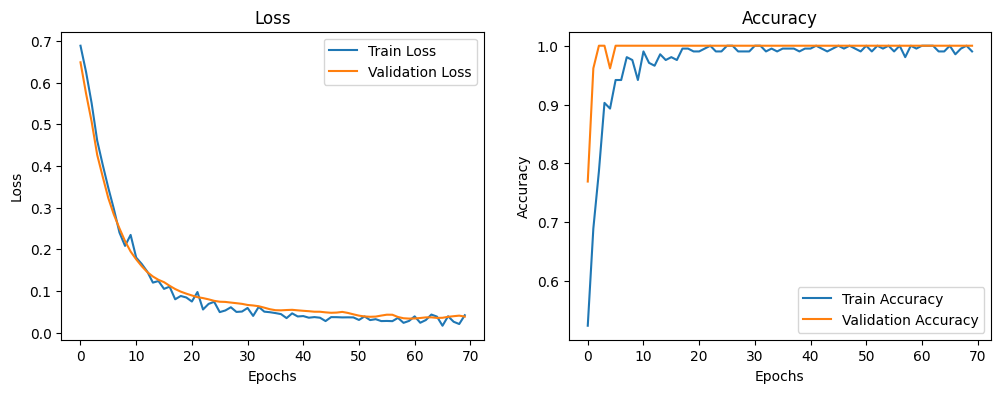

2/2 [==============================] - 0s 9ms/step - loss: 0.0385 - accuracy: 1.0000
Test Loss: 0.03848119080066681
Test Accuracy: 1.0


In [7]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# 데이터 파일 로드
normal_data = pd.read_csv("3000rpm normal data/stream2024_4_23_0_2.csv")
carriage_data = pd.read_csv("3000rpm carriage damage/stream2024_4_23_3_30.csv")

# 정상 데이터와 고장 데이터의 모터 및 소리 데이터 추출
normal_motor_data = normal_data[['motor1_x', 'motor1_y', 'motor1_z']]
normal_sound_data = normal_data['sound']
carriage_motor_data = carriage_data[['motor1_x', 'motor1_y', 'motor1_z']]
carriage_sound_data = carriage_data['sound']

# 정규화
scaler = StandardScaler()
normal_motor_data_normalized = scaler.fit_transform(normal_motor_data)
normal_sound_data_normalized = scaler.fit_transform(normal_sound_data.values.reshape(-1, 1))
carriage_motor_data_normalized = scaler.fit_transform(carriage_motor_data)
carriage_sound_data_normalized = scaler.fit_transform(carriage_sound_data.values.reshape(-1, 1))

# STFT 수행
fs = 5000
_, _, normal_motor_stft = scipy.signal.stft(normal_motor_data_normalized.flatten(), fs=fs)
_, _, normal_sound_stft = scipy.signal.stft(normal_sound_data_normalized.flatten(), fs=fs)
_, _, carriage_motor_stft = scipy.signal.stft(carriage_motor_data_normalized.flatten(), fs=fs)
_, _, carriage_sound_stft = scipy.signal.stft(carriage_sound_data_normalized.flatten(), fs=fs)

# 각 STFT 결과의 크기 확인
print("Shape of normal_motor_stft:", normal_motor_stft.shape)
print("Shape of normal_sound_stft:", normal_sound_stft.shape)
print("Shape of carriage_motor_stft:", carriage_motor_stft.shape)
print("Shape of carriage_sound_stft:", carriage_sound_stft.shape)

# 데이터 합치기
X_normal = np.concatenate((normal_motor_stft[:, :2345, np.newaxis], normal_sound_stft[:, :, np.newaxis]), axis=-1)
X_carriage = np.concatenate((carriage_motor_stft[:, :2345, np.newaxis], carriage_sound_stft[:, :, np.newaxis]), axis=-1)


# 레이블 생성
y_normal = np.zeros(X_normal.shape[0])
y_carriage = np.ones(X_carriage.shape[0])

# 데이터셋 합치기
X = np.concatenate((X_normal, X_carriage), axis=0)
y = np.concatenate((y_normal, y_carriage), axis=0)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# 모델 구성
model = Sequential()
model.add(Conv2D(16, kernel_size=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 얼리스탑 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# 모델 훈련
history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/200
3/3 [==============================] - 2s 423ms/step - loss: 1.6416 - accuracy: 0.2112 - val_loss: 1.5910 - val_accuracy: 0.1705
Epoch 2/200
3/3 [==============================] - 1s 429ms/step - loss: 1.5209 - accuracy: 0.3430 - val_loss: 1.5535 - val_accuracy: 0.4264
Epoch 3/200
3/3 [==============================] - 1s 390ms/step - loss: 1.4276 - accuracy: 0.5039 - val_loss: 1.4892 - val_accuracy: 0.4729
Epoch 4/200
3/3 [==============================] - 1s 399ms/step - loss: 1.3165 - accuracy: 0.5969 - val_loss: 1.3974 - val_accuracy: 0.4031
Epoch 5/200
3/3 [==============================] - 1s 384ms/step - loss: 1.2189 - accuracy: 0.6473 - val_loss: 1.2883 - val_accuracy: 0.5659
Epoch 6/200
3/3 [==============================] - 1s 414ms/step - loss: 1.0841 - accuracy: 0.7229 - val_loss: 1.2584 - val_accuracy: 0.6124
Epoch 7/200
3/3 [==============================] - 1s 458ms/step - loss: 1.0609 - accuracy: 0.7190 - val_loss: 1.2201 - val_accuracy: 0.5659
Epoch 8/200
3

Epoch 59/200
3/3 [==============================] - 1s 378ms/step - loss: 0.0883 - accuracy: 0.9922 - val_loss: 0.5854 - val_accuracy: 0.7829
Epoch 60/200
3/3 [==============================] - 2s 454ms/step - loss: 0.0885 - accuracy: 0.9961 - val_loss: 0.5365 - val_accuracy: 0.8140
Epoch 61/200
3/3 [==============================] - 1s 384ms/step - loss: 0.0887 - accuracy: 0.9961 - val_loss: 0.5219 - val_accuracy: 0.8295
Epoch 62/200
3/3 [==============================] - 1s 386ms/step - loss: 0.0617 - accuracy: 1.0000 - val_loss: 0.5320 - val_accuracy: 0.8140
Epoch 63/200
3/3 [==============================] - 1s 374ms/step - loss: 0.0638 - accuracy: 0.9961 - val_loss: 0.5435 - val_accuracy: 0.7752
Epoch 64/200
3/3 [==============================] - 1s 388ms/step - loss: 0.0666 - accuracy: 0.9942 - val_loss: 0.5560 - val_accuracy: 0.7597
Epoch 65/200
3/3 [==============================] - 1s 383ms/step - loss: 0.0663 - accuracy: 0.9961 - val_loss: 0.5777 - val_accuracy: 0.7674
Epoch 

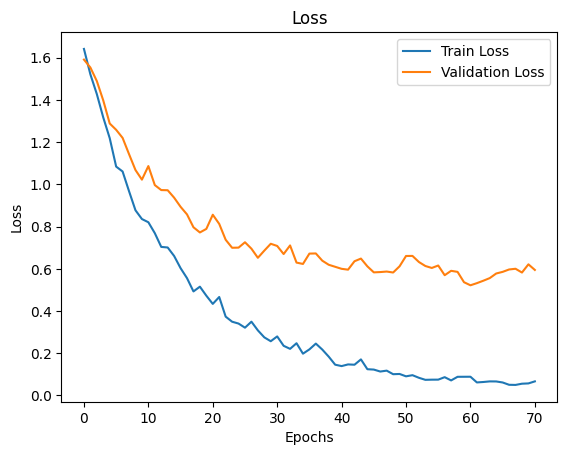

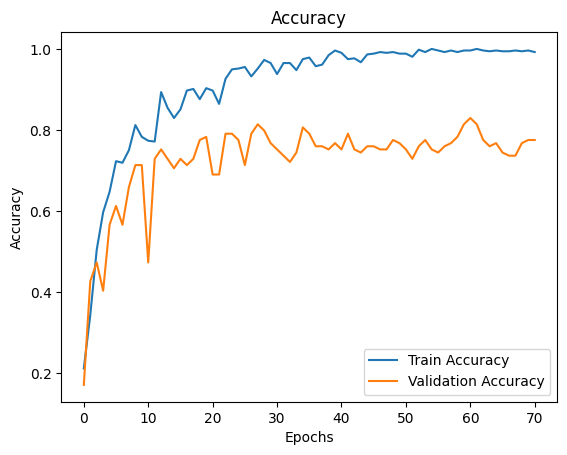

5/5 [==============================] - 0s 17ms/step - loss: 0.5946 - accuracy: 0.7752
Test Loss: 0.594569981098175
Test Accuracy: 0.7751938104629517


In [13]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# 데이터 파일 로드
normal_data = pd.read_csv("3000rpm normal data/stream2024_4_23_0_2.csv")
carriage_data = pd.read_csv("3000rpm carriage damage/stream2024_4_23_3_30.csv")
highspeed_data = pd.read_csv("3000rpm high-speed damage/stream2024_4_23_0_57.csv")
lack_data = pd.read_csv("3000rpm lack of lubrication/stream2024_4_23_2_40.csv")
corrosion_data = pd.read_csv("3000rpm oxidation and corrosion/stream2024_4_23_1_50.csv")

# 정상 데이터와 고장 데이터의 모터 및 소리 데이터 추출
normal_motor_data = normal_data[['motor1_x', 'motor1_y', 'motor1_z']]
normal_sound_data = normal_data['sound']
carriage_motor_data = carriage_data[['motor1_x', 'motor1_y', 'motor1_z']]
carriage_sound_data = carriage_data['sound']
highspeed_motor_data = highspeed_data[['motor1_x', 'motor1_y', 'motor1_z']]
highspeed_sound_data = highspeed_data['sound']
lack_motor_data = lack_data[['motor1_x', 'motor1_y', 'motor1_z']]
lack_sound_data = lack_data['sound']
corrosion_motor_data = corrosion_data[['motor1_x', 'motor1_y', 'motor1_z']]
corrosion_sound_data = corrosion_data['sound']

# 정규화
scaler = StandardScaler()
normal_motor_data_normalized = scaler.fit_transform(normal_motor_data)
normal_sound_data_normalized = scaler.fit_transform(normal_sound_data.values.reshape(-1, 1))
carriage_motor_data_normalized = scaler.fit_transform(carriage_motor_data)
carriage_sound_data_normalized = scaler.fit_transform(carriage_sound_data.values.reshape(-1, 1))
highspeed_motor_data_normalized = scaler.fit_transform(highspeed_motor_data)
highspeed_sound_data_normalized = scaler.fit_transform(highspeed_sound_data.values.reshape(-1, 1))
lack_motor_data_normalized = scaler.fit_transform(lack_motor_data)
lack_sound_data_normalized = scaler.fit_transform(lack_sound_data.values.reshape(-1, 1))
corrosion_motor_data_normalized = scaler.fit_transform(corrosion_motor_data)
corrosion_sound_data_normalized = scaler.fit_transform(corrosion_sound_data.values.reshape(-1, 1))

# STFT 수행
fs = 5000
_, _, normal_motor_stft = scipy.signal.stft(normal_motor_data_normalized.flatten(), fs=fs)
_, _, normal_sound_stft = scipy.signal.stft(normal_sound_data_normalized.flatten(), fs=fs)
_, _, carriage_motor_stft = scipy.signal.stft(carriage_motor_data_normalized.flatten(), fs=fs)
_, _, carriage_sound_stft = scipy.signal.stft(carriage_sound_data_normalized.flatten(), fs=fs)
_, _, highspeed_motor_stft = scipy.signal.stft(highspeed_motor_data_normalized.flatten(), fs=fs)
_, _, highspeed_sound_stft = scipy.signal.stft(highspeed_sound_data_normalized.flatten(), fs=fs)
_, _, lack_motor_stft = scipy.signal.stft(lack_motor_data_normalized.flatten(), fs=fs)
_, _, lack_sound_stft = scipy.signal.stft(lack_sound_data_normalized.flatten(), fs=fs)
_, _, corrosion_motor_stft = scipy.signal.stft(corrosion_motor_data_normalized.flatten(), fs=fs)
_, _, corrosion_sound_stft = scipy.signal.stft(corrosion_sound_data_normalized.flatten(), fs=fs)

# 데이터 합치기
X_normal = np.concatenate((normal_motor_stft[:, :2345, np.newaxis], normal_sound_stft[:, :, np.newaxis]), axis=-1)
X_carriage = np.concatenate((carriage_motor_stft[:, :2345, np.newaxis], carriage_sound_stft[:, :, np.newaxis]), axis=-1)
X_highspeed = np.concatenate((highspeed_motor_stft[:, :2345, np.newaxis], highspeed_sound_stft[:, :, np.newaxis]), axis=-1)
X_lack = np.concatenate((lack_motor_stft[:, :2345, np.newaxis], lack_sound_stft[:, :, np.newaxis]), axis=-1)
X_corrosion = np.concatenate((corrosion_motor_stft[:, :2345, np.newaxis], corrosion_sound_stft[:, :, np.newaxis]), axis=-1)

# 레이블 생성
y_normal = np.zeros(X_normal.shape[0])
y_carriage = np.ones(X_carriage.shape[0])
y_highspeed = np.full((X_highspeed.shape[0],), 2)
y_lack = np.full((X_lack.shape[0],), 3)
y_corrosion = np.full((X_corrosion.shape[0],), 4)

# 데이터셋 합치기
X = np.concatenate((X_normal, X_carriage, X_highspeed, X_lack, X_corrosion), axis=0)
y = np.concatenate((y_normal, y_carriage, y_highspeed, y_lack, y_corrosion), axis=0)

# 레이블을 원-핫 인코딩으로 변환
y = to_categorical(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# 모델 구성
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  # 다중 분류를 위해 출력 뉴런 수를 클래스 수와 같이 설정

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 얼리스탑 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# 모델 훈련
history = model.fit(X_train, y_train, batch_size=256, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 서머리
model.summary()

# 훈련 및 검증 데이터에 대한 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
